### Laptop Price Prediction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## EDA (Exploratory Data Analysis)

In [10]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# checking Duplicate Row
df.duplicated().sum()

29

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


#### 1. we have to seperate Categorical variables and Numerical Variables

In [12]:
# Categorical Varaible
cat_vars = df.select_dtypes(include = ["object"]).columns
# Numerical Variable
num_vars = df.select_dtypes(include = ["int32",'int64','float32','float64']).columns

cat_vars, num_vars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [13]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [29]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

#### 2. Create a function that will show all unique value of columns and count each unique value

In [14]:
def unique_values(col):
    print(f"Detail of the ({col}) columns is : {df[col].unique()}")

def values_count(col):
    print(f"Value count of the {col} columns  is : {df[col].value_counts()}")


In [13]:
# This function will show all unique value of thecolumns
for col in df.columns:
    unique_values(col)
    print("-"*75)

Detail of the (Company) columns is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Detail of the (TypeName) columns is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Detail of the (Inches) columns is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Detail of the (ScreenResolution) columns is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / 

In [14]:
# This function will number of unique value of the columns

for col in df.columns:
    values_count(col)
    print("-"*75)

Value count of the Company columns  is : Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
---------------------------------------------------------------------------
Value count of the TypeName columns  is : TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
---------------------------------------------------------------------------
Value count of the Inches columns  is : Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18

## 3. Visualization

#### View the distribution of price columns

<Figure size 10x10 with 0 Axes>

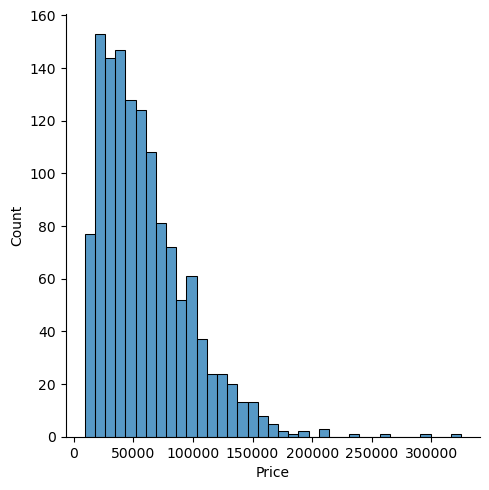

In [15]:
plt.figure(figsize = (0.1,0.1))
sb.displot(data = df, x = df.Price)

#### Plotting countplot for the categorical variables

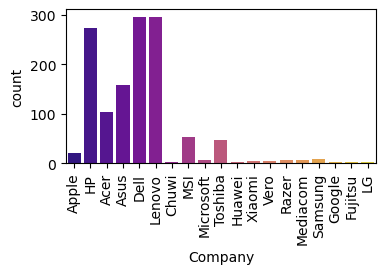

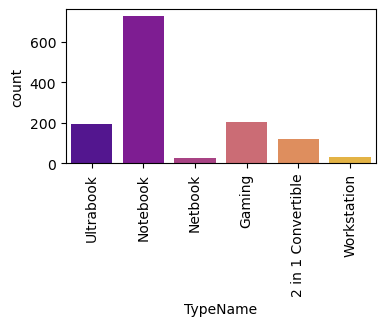

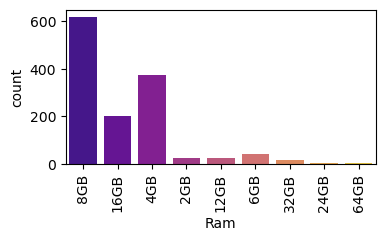

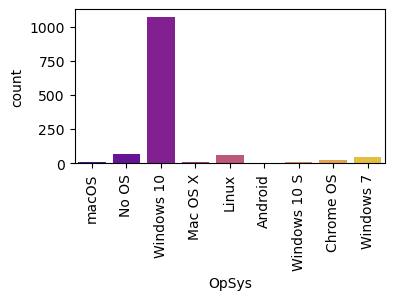

In [14]:
def draw_countplot(col):
    plt.figure(figsize = (4,2))
    sb.countplot(data = df , x = df[col], palette = "plasma")
    plt.xticks(rotation = "vertical")

catg_var = ['Company', 'TypeName', 'Ram','OpSys',]
for col in catg_var:
    draw_countplot(col)

#### The average Price of laptop of each company

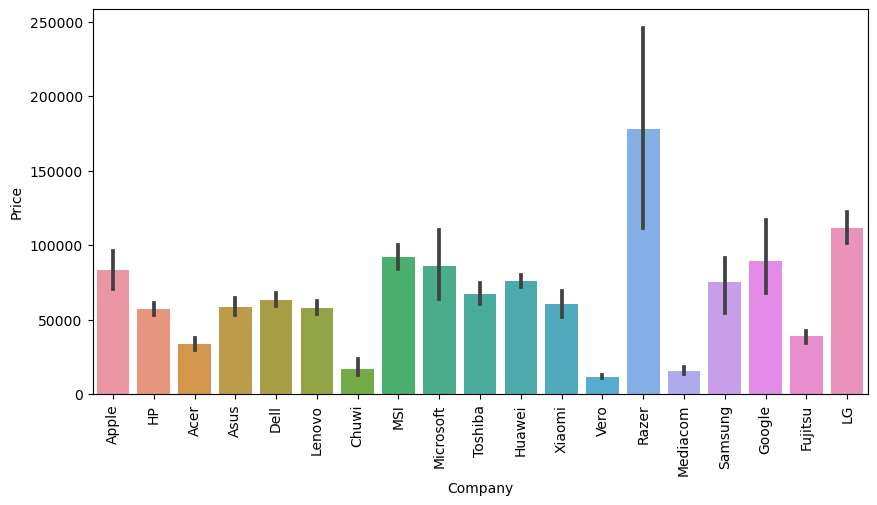

In [62]:
# The line shows the average price of laptop
plt.figure(figsize = (10,5))
sb.barplot(x = df.Company, y = df.Price)
plt.xticks(rotation = "vertical")
# it will remove the word above the grapgh
plt.show()

#### laptop type and variation about price

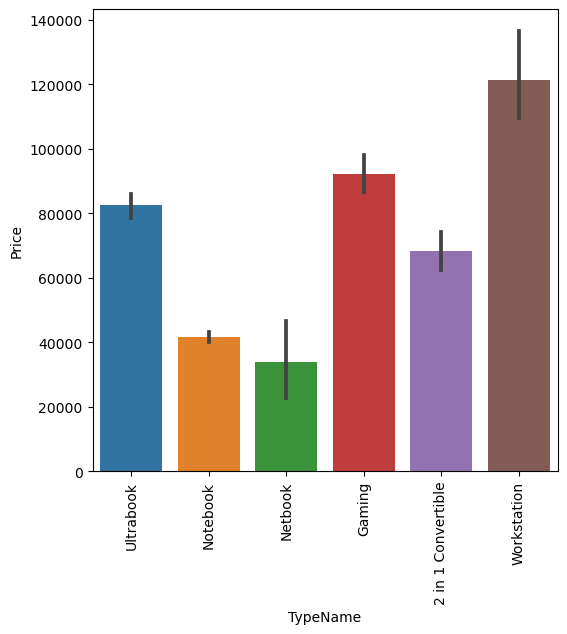

In [75]:
plt.figure(figsize = (6,6))
sb.barplot(x = df.TypeName, y = df.Price)
plt.xticks(rotation = "vertical")
plt.show()

#### Varaition of inches towards Price

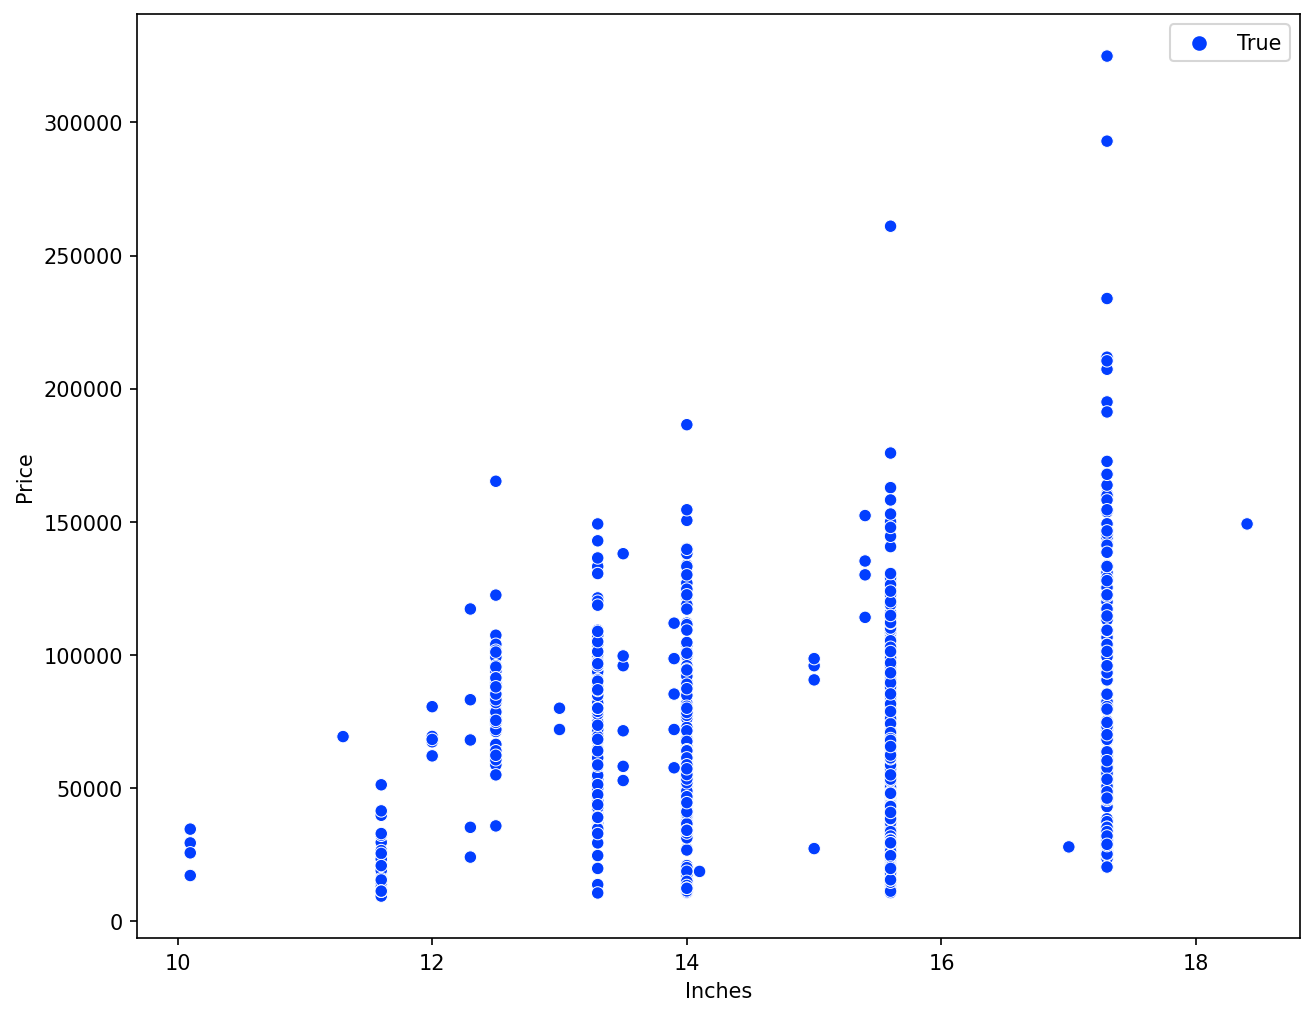

In [71]:
plt.figure(figsize = (10,8), dpi = 150)
sb.scatterplot(x = df.Inches, y = df.Price,hue = True, palette = "bright")
plt.show()

## 4. Text Processing

#### In Screen Resolution Columns we have many type of Screen Resolution out there as shown "Touch Screen" and "Normal" and "IPS Panel" are the 3 Parts on the basis of which we can segregate the things

In [166]:
#df.ScreenResolution.value_counts()

#### Creating a new column, touch Screen if the value is 1 that laptop is Touch screen

In [15]:
df1 = df.copy()

In [16]:
df1['Touch_Screen'] = df1["ScreenResolution"].apply(lambda Screen:1 if 'Touchscreen' in Screen else 0)
df1.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0


In [18]:
df1.Touch_Screen.value_counts()

Touch_Screen
0    1111
1     192
Name: count, dtype: int64

In [167]:
#sb.barplot(x = df1.Touch_Screen, y = df1.Price)

#### Creating a new column IPS, if the value is 1 that laptop is IPS display

In [17]:
df1["IPS"] = df1["ScreenResolution"].apply(lambda IPS : 1 if 'IPS' in IPS else 0)
df1.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0


In [168]:
#sb.barplot(x = df1.IPS, y = df1.Price)

#### Extracting the X Resolution and the Y Resolution

In [18]:
# Split function will spite the str when it found x , n = 1 mean when found x first, then it spite the str
# n: Numbers of max separations to make in a single string, default is -1 which means all. 
# expand: Boolean value, returns a data frame with different value in different columns if True. Else it returns a series with list of strings. 
Splitdf = df["ScreenResolution"].str.split("x", n = 1, expand = True)
Splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [19]:
# X resolution and y resolution is seperated, but in x resolution there is some string we have to remove it
df1['x_res'] = Splitdf[0]
df1['y_res'] = Splitdf[1]
#df1.head()


So basically from that whole text of the x_res column, we need to extract the digit from it , but the problem is the number are scatter in some cases, that is the reason why i am using regex, if we use this we will exactly get the numbers which we are looking for, so first we have to replace all the commas "," with space " " and then find all numbers from that string as "\d+\.?\d+"     

"\d" means that integer number   
"\.?" all number which come after number      
"\d+" the string must end with number 

In [20]:
df1["x_res"] = df1["x_res"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df1.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [21]:
# The x_res and y_res are "string" now i have to convert into "int"
df1["x_res"] = df1["x_res"].astype('int')
df1["y_res"] = df1["y_res"].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touch_Screen      1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [22]:
df1.corr(numeric_only = True)["Price"]

Inches          0.068197
Price           1.000000
Touch_Screen    0.191226
IPS             0.252208
x_res           0.556529
y_res           0.552809
Name: Price, dtype: float64

The Price Factor are 55% affected by resolution factor x_res and y_res, it may increase Price more.    

Now we have to create a new columns PPI" Pixel per inches". by combining "x_res" and "y_res" with "inches".   

The formula is 

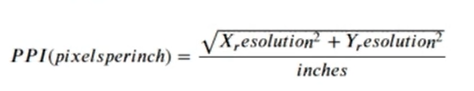

In [23]:
df1["PPI"] = (df1["x_res"]**2 + df1["y_res"]**2)**0.5/df1["Inches"]

In [24]:
df1.corr(numeric_only = True)["Price"]

Inches          0.068197
Price           1.000000
Touch_Screen    0.191226
IPS             0.252208
x_res           0.556529
y_res           0.552809
PPI             0.473487
Name: Price, dtype: float64

In [25]:
# Now we observe from data that PPI is good co_relation with Price, so we remove "Inches" which is already low correlation and "x_res", "y_res"
df1.drop(columns = ["Inches", "x_res", "y_res"], inplace = True)
df1.head(2)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940


#### CPU Columns

In [26]:
# The more commons CPU are: "Intel Core i3,i5,i7" and "other Intel" and "AMD" so we have to seperate these five type.
# This Function will took the first three words from the string
df1["CPU_Name"] = df1["Cpu"].apply(lambda text: ' '.join(text.split()[:3]))

In [150]:
#df1.head(2)

In [27]:
# Now There is Three type of CPU which "Intel Core i7,i5,i3", "Other Intel" and "AMD(Other)"
# Now we have to Seperate these type

def Processor_type(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD(Other) Processor'

In [28]:
df1["CPU_Name"] = df1["CPU_Name"].apply(lambda text:Processor_type(text))

In [32]:
#df1.head(10)

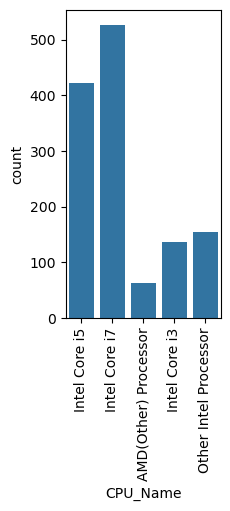

In [30]:
plt.figure(figsize = (2,4))
sb.countplot(x = df1.CPU_Name)
plt.xticks(rotation = "vertical")
plt.show()

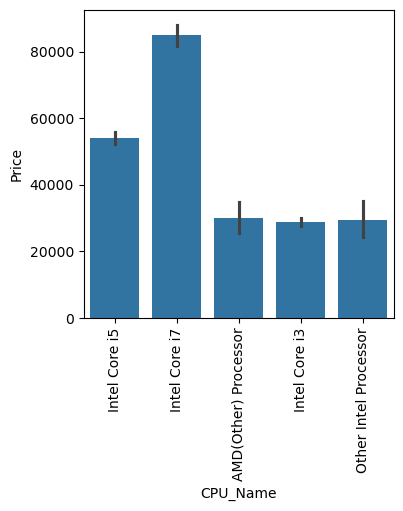

In [29]:
plt.figure(figsize = (4,4))
sb.barplot(x = df1.CPU_Name, y = df1.Price)
plt.xticks(rotation = "vertical")
plt.show()

In [30]:
df1.drop(columns = ["Cpu"], inplace = True)

In [159]:
#df1.head()

#### Analysis the Ram columns

#### Method 1 How to sepeare integer from string

In [73]:
# This function will remove The GB string 
Ram = df1["Weight"].str.replace('kg','')

In [37]:
Ram.astype(int)

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

#### Method 2 How to sepeare integer from string

In [38]:
# apply(lambda x:x[0]) this function will show the value of each array
Ram1 = df1["Ram"].str.findall(r'\d+').apply(lambda x:x[0])

In [31]:
#Ram1.astype(int)
df2 = df1.copy()

In [32]:
df2.Ram = df1["Ram"].str.findall(r'\d+').apply(lambda x:x[0])

In [188]:
#df2.head()

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_18484\15452431.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = df2.Ram, y = df2.Price, palette = "deep")


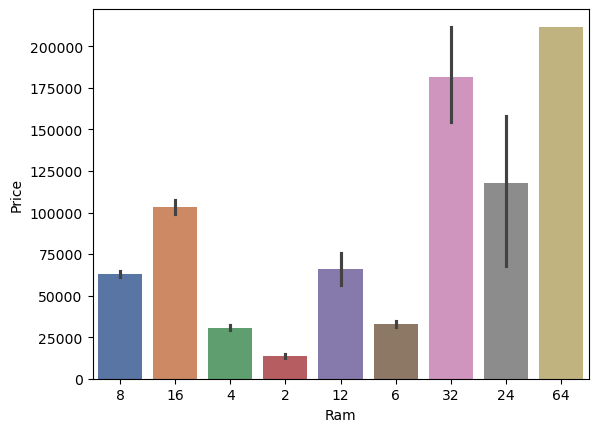

In [38]:
sb.barplot(x = df2.Ram, y = df2.Price, palette = "deep")
plt.show()

### Memory Columns

In [41]:
df2["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [39]:
df3 = df2.copy()

In [40]:
# 4 Most common variants observed, HDD, SDD, Flash, Hybrid

# This will remove the decimal space for example 1.0 TB is 1 TB
df3["Memory"] = df3["Memory"].astype(str).replace("\.0",'', regex = True)

# Replace the GB word with " "
df3["Memory"] = df3["Memory"].str.replace('GB','')

# Replace the TB With '000'
df3['Memory'] = df3['Memory'].str.replace('TB','000')

# Split the word accross the '+' character
newdf = df3["Memory"].str.split("+", n = 1, expand = True)
newdf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [41]:
# Now we have to Create two new columns 'Memory' and 'Extra Memory'
# Python strip() function is used to remove extra whitespaces and specified characters from the start and from the end of the strip irrespective of how the parameter is passed
df3['F_Memory'] = newdf[0]
df3['F_Memory'] = df3["F_Memory"].str.strip()

In [234]:
df3.head(2)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,CPU_Name,F_Memory
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage


In [42]:
# There are four main type of memory 'HDD', 'SSD', 'Hybrib', 'Flash Storage'
# Now we have to Create all these new columns 

def applychange(Name):
     df3["F_"+Name] = df3["F_Memory"].apply(lambda x: 1 if Name in x else 0)


List_of_Memory = ['HDD','SSD','Hybrid','Flash']

for Name in List_of_Memory:
    applychange(Name)


df3.head()
   

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,CPU_Name,F_Memory,F_HDD,F_SSD,F_Hybrid,F_Flash
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [43]:
# Now we have to remove all character from 'F_Memory' Columns
#df4 = df3.copy()
df3['F_Memory'] = df3["F_Memory"].str.findall(r'\d+').apply(lambda x:x[0])
df3['F_Memory'].value_counts()

F_Memory
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [130]:
df3.head(2)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,CPU_Name,F_Memory,F_HDD,F_SSD,F_Hybrid,F_Flash
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1


In [44]:
# S mean Secondary Memory
df3['S_Memory'] = newdf[1]
df3.head(2)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,CPU_Name,F_Memory,F_HDD,F_SSD,F_Hybrid,F_Flash,S_Memory
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,128,0,0,0,1,None


In [45]:
# There are four main type of memory 'HDD', 'SSD', 'Hybrib', 'Flash Storage'
# Now we have to Create all these new columns for secondary Memory

def applychanges(Name):
     df3["S_"+Name] = df3["S_Memory"].apply(lambda x: 1 if Name in x else 0)


List_of_Memory1 = ['HDD','SSD','Hybrid','Flash']
df3["S_Memory"] = df3["S_Memory"].fillna("0")

for Name in List_of_Memory1:
    applychanges(Name)


df3.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,...,F_Memory,F_HDD,F_SSD,F_Hybrid,F_Flash,S_Memory,S_HDD,S_SSD,S_Hybrid,S_Flash
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [46]:
# Now to remove extra string from number
df3['S_Memory'] = df3["S_Memory"].str.findall(r'\d+').apply(lambda x:x[0])
df3['S_Memory'].value_counts()

S_Memory
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [47]:
# Now we have to convert it into integers
df3['F_Memory'] = df3['F_Memory'].astype('int')
df3['S_Memory'] = df3['S_Memory'].astype('int')
df3.head(2)

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,...,F_Memory,F_HDD,F_SSD,F_Hybrid,F_Flash,S_Memory,S_HDD,S_SSD,S_Hybrid,S_Flash
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,...,128,0,0,0,1,0,0,0,0,0


In [49]:
df4 = df3.copy()

In [50]:
df4["HDD"] = df4["F_Memory"]*df4["F_HDD"]+df4["S_Memory"]*df4["S_HDD"]
df4["SSD"] = df4["F_Memory"]*df4["F_SSD"]+df4["S_Memory"]*df4["S_SSD"]
df4["Hybrid"] = df4["F_Memory"]*df4["F_Hybrid"]+df4["S_Memory"]*df4["S_Hybrid"]
df4["Flash_Storage"] = df4["F_Memory"]*df4["F_Flash"]+df4["S_Memory"]*df4["S_Flash"]

In [145]:
df4.head()

,Company,TypeName,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,...,F_Flash,S_Memory,S_HDD,S_SSD,S_Hybrid,S_Flash,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,...,0,0,0,0,0,0,0,256,0,0


In [51]:
df5 = df4.copy()

In [56]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Ram               1303 non-null   object 
 4   Memory            1303 non-null   object 
 5   Gpu               1303 non-null   object 
 6   OpSys             1303 non-null   object 
 7   Weight            1303 non-null   object 
 8   Price             1303 non-null   float64
 9   Touch_Screen      1303 non-null   int64  
 10  IPS               1303 non-null   int64  
 11  PPI               1303 non-null   float64
 12  CPU_Name          1303 non-null   object 
 13  F_Memory          1303 non-null   int32  
 14  F_HDD             1303 non-null   int64  
 15  F_SSD             1303 non-null   int64  
 16  F_Hybrid          1303 non-null   int64  


In [52]:
df5.drop(columns = ["F_Memory","F_HDD","F_Hybrid","F_Flash","F_SSD","S_Memory","S_HDD","S_Hybrid","S_Flash","S_SSD","Memory","ScreenResolution"], inplace = True)

In [49]:
df5.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,CPU_Name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128


In [53]:
# Remove extra string
df5["Weight"] = df5["Weight"].str.replace('kg','').astype("float64")

In [51]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   object 
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float64
 6   Price          1303 non-null   float64
 7   Touch_Screen   1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   PPI            1303 non-null   float64
 10  CPU_Name       1303 non-null   object 
 11  HDD            1303 non-null   int64  
 12  SSD            1303 non-null   int64  
 13  Hybrid         1303 non-null   int64  
 14  Flash_Storage  1303 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 152.8+ KB


In [54]:
df5.corr(numeric_only = True)["Price"]

Weight           0.210370
Price            1.000000
Touch_Screen     0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [55]:
# The relation of hybrid is very low so we have to remove it
df5.drop(columns = ["Hybrid"], inplace = True)

In [56]:
df5.corr(numeric_only = True)["Price"]

Weight           0.210370
Price            1.000000
Touch_Screen     0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Flash_Storage   -0.040511
Name: Price, dtype: float64

### Analysis on GPU

In [57]:
df6 = df5.copy()

In [58]:
df6.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [59]:
# We have to take the first name of the GPU
df6["GPU_Brand"] = df6["Gpu"].apply(lambda x:x.split()[0])

In [60]:
df6.drop(columns = ["Gpu"], inplace = True)

In [61]:
df6["GPU_Brand"].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

<Axes: xlabel='GPU_Brand', ylabel='count'>

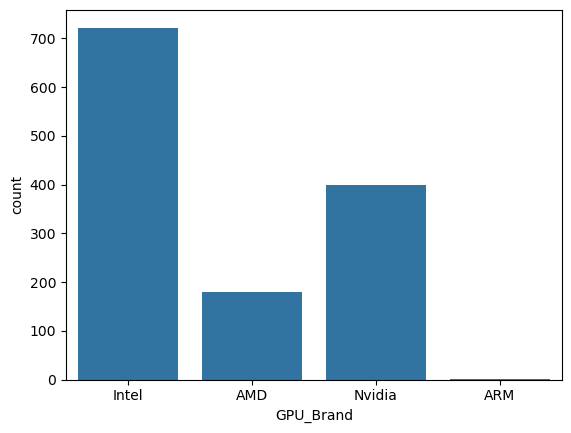

In [61]:
sb.countplot(x = df6["GPU_Brand"])

In [62]:
# There is only one ARM GPU so we have to remove it
df6 = df6[df6["GPU_Brand"] != "ARM"]
df6["GPU_Brand"].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

C:\Users\Mohsin\AppData\Local\Temp\ipykernel_18484\695314653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = df6["GPU_Brand"], y = df6.Price, palette = "plasma")


<Axes: xlabel='GPU_Brand', ylabel='Price'>

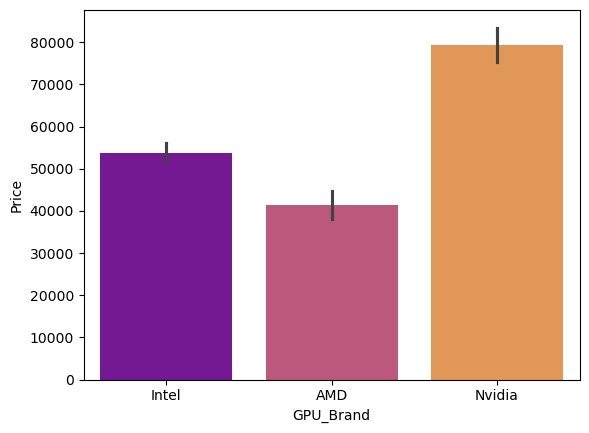

In [76]:
sb.barplot(x = df6["GPU_Brand"], y = df6.Price, palette = "plasma")

### Analysis on Operating System

In [64]:
df7 = df6.copy()

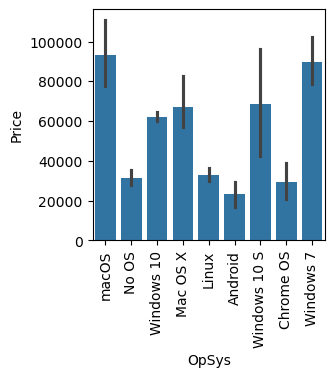

In [71]:
plt.figure(figsize = (3,3))
sb.barplot(x = df6.OpSys, y = df6.Price)
plt.xticks(rotation = "vertical")
plt.show()

In [72]:
df7.OpSys.value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [65]:
# There is nine common type of operating system.
# After some analysis we put
# window 10, window 7 , windows 10 s -------> Windows
# Mac Os , mac ----> Mac
# The other we put in -------> Other

def OS_catg(text):
    if text == "Windows 10" or text == "windows 7" or text == "Windows 10 S":
        return "Windows"
    elif text == "macOS" or text == "Mac OS X":
        return "MAC"
    else:
        return "Other"
    
    
df7["OpSys"] = df7["OpSys"].apply(lambda x: OS_catg(x))

In [66]:
df7["OpSys"].value_counts()

OpSys
Windows    1080
Other       201
MAC          21
Name: count, dtype: int64

<Axes: xlabel='OpSys', ylabel='count'>

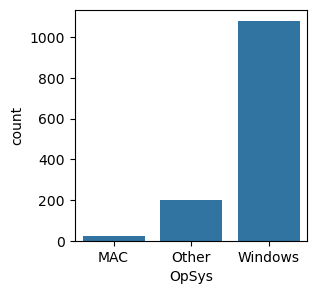

In [67]:
plt.figure(figsize = (3,3))
sb.countplot(x = df7["OpSys"])

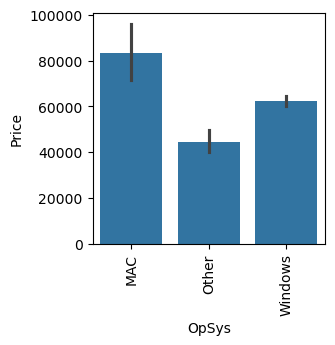

In [68]:
plt.figure(figsize = (3,3))
sb.barplot(x = df7.OpSys, y = df7.Price)
plt.xticks(rotation = "vertical")
plt.show()

### Weight Analysis 

<Axes: xlabel='Weight', ylabel='Price'>

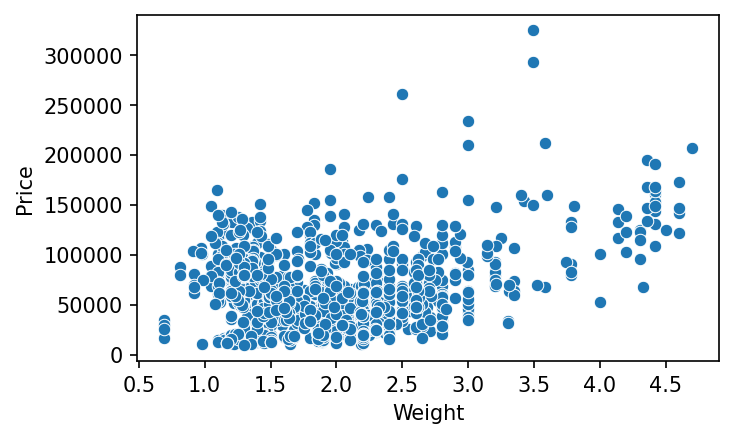

In [78]:
plt.figure(figsize = (5,3), dpi = 150)
sb.scatterplot(x = df7.Weight, y = df7.Price)

<Figure size 300x200 with 0 Axes>

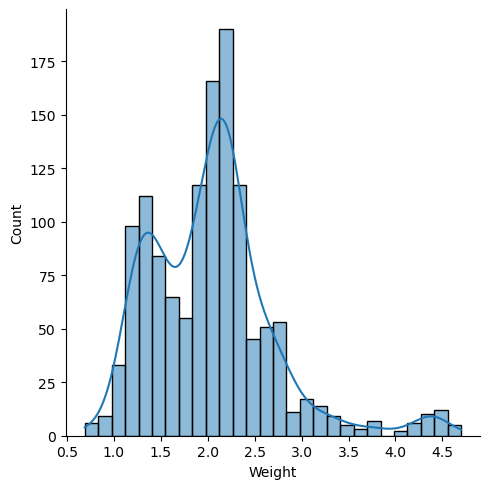

In [69]:
plt.figure(figsize = (3,2))
sb.displot(x = df7.Weight, kde = True)
plt.show()

#### Price Analysis

<Figure size 200x200 with 0 Axes>

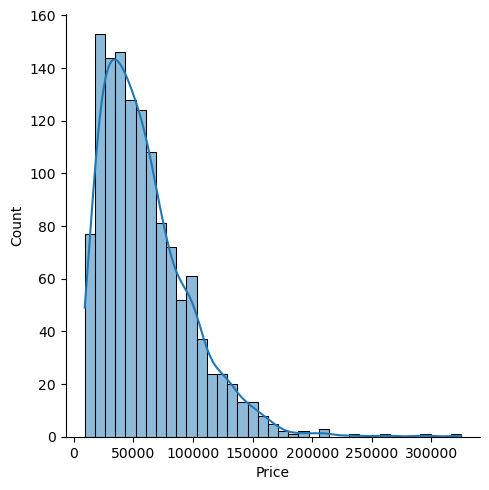

In [81]:
plt.figure(figsize = (2,2))
sb.displot(df7.Price, kde =True)
plt.show()

<Figure size 200x200 with 0 Axes>

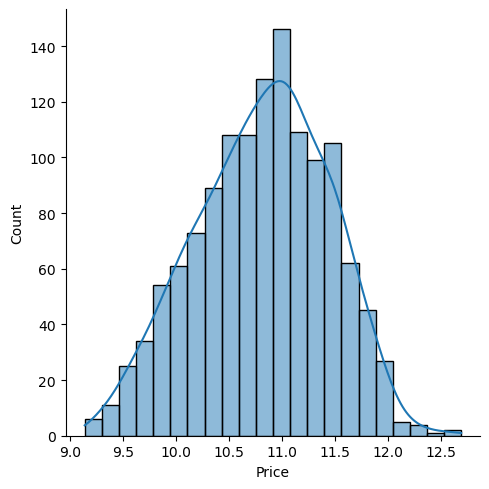

In [70]:
# The Price Columns is Skew at Right side so we take its log value
# Then the skewness is removed 
plt.figure(figsize = (2,2))
sb.displot(np.log(df7.Price), kde =True)
plt.show()

In [71]:
df7.corr(numeric_only = True)["Price"]

Weight           0.209867
Price            1.000000
Touch_Screen     0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Flash_Storage   -0.040067
Name: Price, dtype: float64

<Axes: >

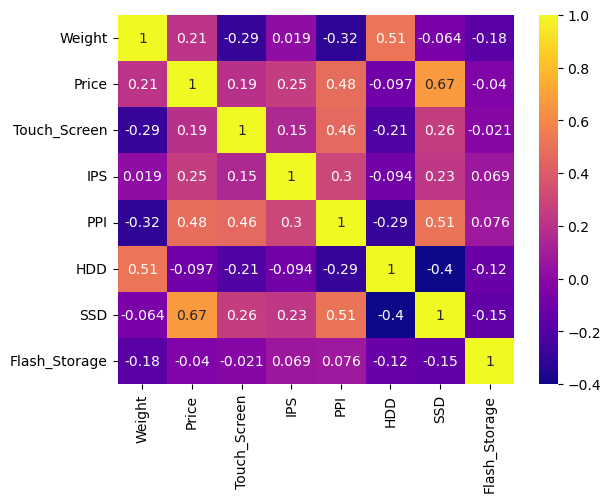

In [103]:
sb.heatmap(df7.corr(numeric_only = True), annot = True, cmap = "plasma")

### Model Building

In [97]:
target = np.log(df7["Price"])
train = df7.drop(["Price"], axis = 1)

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from xghoost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

from sklearn import tree

In [105]:
xtrain, xtest, ytrain, ytest = train_test_split(train, target, test_size = 0.15, random_state = 2)

xtrain.shape, xtest.shape

((1106, 13), (196, 13))

##### There is a class which we imported name as columns Transformer. we use this widely while building our models using Pipeline. so for this we have to get the index numbers of the columns which are having Categorical Variables

In [108]:
mapper = {i: value for i, value in enumerate(xtrain.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'Touch_Screen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_Name',
 9: 'HDD',
 10: 'SSD',
 11: 'Flash_Storage',
 12: 'GPU_Brand'}

## Linear Regression

In [112]:
# we will apply one hot encoding on the categorical columns
# this is categorical columns---->[0,1,3,8,12]

step1 = ColumnTransformer(transformers =[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,12])
], remainder = "passthrough")

Algorithm = LinearRegression()

pipe = Pipeline([('step1',step1),('Algorithm', Algorithm)])

pipe.fit(xtrain, ytrain)

y_pred = pipe.predict(xtest)

print("R2 Score", metrics.r2_score(ytest, y_pred))
print("MAE", metrics.mean_absolute_error(ytest, y_pred))

R2 Score 0.8052868769014168
MAE 0.21422265562273243


### Ridge Regression

In [113]:
# we will apply one hot encoding on the categorical columns
# this is categorical columns---->[0,1,3,8,12]

step1 = ColumnTransformer(transformers =[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,12])
], remainder = "passthrough")

Ridge_Reg = Ridge(alpha = 10)

pipe = Pipeline([('step1',step1),('Algorithm', Ridge_Reg)])

pipe.fit(xtrain, ytrain)

y_pred = pipe.predict(xtest)

print("R2 Score", metrics.r2_score(ytest, y_pred))
print("MAE", metrics.mean_absolute_error(ytest, y_pred))

R2 Score 0.8076914232716821
MAE 0.21449595492642817


In [114]:
# we will apply one hot encoding on the categorical columns
# this is categorical columns---->[0,1,3,8,12]

step1 = ColumnTransformer(transformers =[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,12])
], remainder = "passthrough")

Lasso_Reg = Lasso(alpha = 0.001)

pipe = Pipeline([('step1',step1),('Algorithm', Lasso_Reg)])

pipe.fit(xtrain, ytrain)

y_pred = pipe.predict(xtest)

print("R2 Score", metrics.r2_score(ytest, y_pred))
print("MAE", metrics.mean_absolute_error(ytest, y_pred))

R2 Score 0.8007115073692128
MAE 0.21712575569011988


### Decision Tree

In [123]:
# we will apply one hot encoding on the categorical columns
# this is categorical columns---->[0,1,3,8,12]

step1 = ColumnTransformer(transformers =[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,12])
], remainder = "passthrough")

DT = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([('step1',step1),('Algorithm', DT)])

pipe.fit(xtrain, ytrain)

y_pred = pipe.predict(xtest)

print("R2 Score", metrics.r2_score(ytest, y_pred))
print("MAE", metrics.mean_absolute_error(ytest, y_pred))

R2 Score 0.8222579520927662
MAE 0.19376967377971835


### Random Forest

In [124]:
# we will apply one hot encoding on the categorical columns
# this is categorical columns---->[0,1,3,8,12]

step1 = ColumnTransformer(transformers =[
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,12])
], remainder = "passthrough")

RF = RandomForestRegressor()

pipe = Pipeline([('step1',step1),('Algorithm', RF)])

pipe.fit(xtrain, ytrain)

y_pred = pipe.predict(xtest)

print("R2 Score", metrics.r2_score(ytest, y_pred))
print("MAE", metrics.mean_absolute_error(ytest, y_pred))

R2 Score 0.879304194821178
MAE 0.15786848463433464
